In [326]:
import numpy as np
import matplotlib.pyplot as plt
import random
import string

def new_char():
    '''
    returns a random char
    '''
    return random.choice(string.punctuation + string.ascii_letters + string.whitespace)

class Person:
    '''
    class for each person in the population
    '''
    def __init__(self, phrase_length):
        '''
        constructor
        phrase_length (int): length of a target phrase
        
        returns an object of a person with 
        char_array (array): list of chars/phrase
        fitness (float): score of fitness of our person to the target
        '''
        self.phrase_length = phrase_length 
        self.char_array = []
        self.fitness = 0.0
        self.give_birth()
    
    def give_birth(self):
        '''
        method for creating an object of a Person generating random sequence of chars/phrase
        '''
        for i in range (self.phrase_length):
            self.char_array.append(new_char())
        return
    
    def get_person(self):
        '''
        return:
        phrase (str)
        '''
        return ''.join(self.char_array)
    
    def calculate_fitness(self, target):
        '''
        arg: 
        target (str): target phrase
        method for calculating the fitness of each person
        '''
        assert self.phrase_length == len(target)
        self.fitness = (np.array(list(target))==np.array(self.char_array)).sum()/len(target)
        return
        
    def crossover(self, father):
        '''
        arg:
        father (Person): second parent 
        return:
        child (Person): result of crossover of two people
        '''
        m = np.floor(random.random()*self.phrase_length) # select a point 
        child = Person(father.phrase_length) # initialize a Person instance 
        
        # crossover of parents depending on the point
        for i in range(father.phrase_length): 
            if i < m : 
                child.char_array[i] = self.char_array[i]
            else: 
                child.char_array[i] = father.char_array[i]
        return child
    
    def mutate(self, rate):
        '''
        arg:
        rate (float): mutation rate
        method for a person to mutate 
        '''
        for i in range(len(self.char_array)):
            if(random.random()< rate):
                self.char_array[i] = new_char()
        return
    
class Population:
    '''
    population class
    '''
    def __init__(self, target, mutation_rate, number, method_one = True):
        self.target = target 
        self.mutation_rate = mutation_rate
        self.generations = 0 
        self.population = []
        self.mating_pool = []
        self.progress = [] # array for saving the progress of fitness of the best candidate
        self.best_score = 1
        self.method_one = method_one
        self.best = None # best Person
        self.finished = False # indicator to finish
        # generate populstion
        for i in range(number):
            self.population.append(Person(len(self.target)))
        # calculate fitness for each person
        self.calculate_fitness()
        
    def calculate_fitness(self):
        '''
        method for calculating fitness
        '''
        for p in self.population:
            p.calculate_fitness(self.target)
            
    def natural_selection(self):
        '''
        generates the mating pool for future generations
        '''
        self.mating_pool = []
        
        if self.method_one:
            max_fitness = max([person.fitness for person in self.population])
            min_fitness = min([person.fitness for person in self.population])
            for person in self.population:
                current_fitness = int((person.fitness - min_fitness)*100/(max_fitness - min_fitness))
                self.mating_pool.extend([person]*current_fitness)
                
        if not self.method_one:
            for person in self.population:
                current_fitness = int(person.fitness*len(self.target))
                self.mating_pool.extend([person]*current_fitness)
        
    def generate(self):
        '''
        method that randomly chooses parents from mating pool and generates children for next population
        '''
        for i in range(len(self.population)):
            mother = random.choice(self.mating_pool)
            father = random.choice(self.mating_pool)
            child = mother.crossover(father)
            child.mutate(self.mutation_rate)
            self.population[i] = child
        self.generations += 1
    
    def get_best(self):
        '''
        return: 
        jesus (Person): "best" person
        '''
        jesus = self.population[np.argmax([person.fitness for person in self.population])]
        self.best  = jesus
        return jesus
    
    def get_avg_fitness(self):
        '''
        return:
        avg (float): avearge fitness score for a population
        '''
        avg = np.mean([person.fitness for person in self.population])
        return avg
    
    def evaluate(self):
        '''
        finish loop when target is reached
        '''
        if (self.get_best().fitness == self.best_score):
            self.finished = True
        return

In [324]:
def setup():    
    target = 'My life my ruuulez.'
    mutation_rate = 0.01
    init_population_size = 2000
    population = Population(target, mutation_rate, init_population_size)
    while (not population.finished):
        evolve(population)
    plt.figure(figsize=(15,8))
    plt.plot(population.progress)

def evolve(population):
    population.natural_selection()
    population.generate()
    population.calculate_fitness()
    population.evaluate()
    population.progress.append(population.get_best().fitness)
    
    print("***")
    print("Population's fitness: ", population.get_avg_fitness())
    print("Best fitness: ", population.get_best().fitness)
    print("Best match: ", population.get_best().get_person())
    print("Generation: ", population.generations)

***
Population's fitness:  0.0631578947368421
Best fitness:  0.21052631578947367
Best match:  en$Li]/ c) V aje:r
Generation:  1
***
Population's fitness:  0.08871052631578946
Best fitness:  0.2631578947368421
Best match:  e]Kli;l,bt ukkiLz:
Generation:  2
***
Population's fitness:  0.1148157894736842
Best fitness:  0.3157894736842105
Best match:  gy'|i%/ D) "{kqle:r
Generation:  3
***
Population's fitness:  0.1419736842105263
Best fitness:  0.3684210526315789
Best match:  Gy )i>YO$yX	ud,Fez:
Generation:  4
***
Population's fitness:  0.16794736842105262
Best fitness:  0.3684210526315789
Best match:  M Vl'r' Ky<f{umlV..
Generation:  5
***
Population's fitness:  0.18886842105263157
Best fitness:  0.42105263157894735
Best match:  e]Klift $yX	ud,Fez:
Generation:  6
***
Population's fitness:  0.20923684210526314
Best fitness:  0.47368421052631576
Best match:  MH lifqNb_ ruD&tYB.
Generation:  7
***
Population's fitness:  0.22776315789473683
Best fitness:  0.5263157894736842
Best match:  MH 

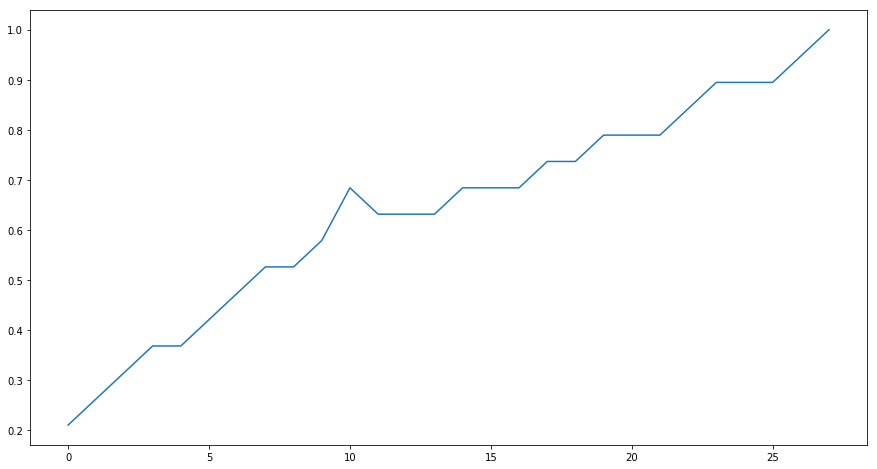

In [327]:
%%time
setup()